In [2]:
!pip install plotly
!pip install pandas
!pip install mathlib
!pip install dask
!pip install igraph
!pip install graphviz
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import mathlib as mb
import plotly as py
import igraph as ig
import networkx as nx
from graphviz import Digraph
import matplotlib.pyplot as plt
from dask import dataframe as df1

In [ ]:
# В случае если нужен graphviz
# !sudo apt-get -y install graphviz

FINAL_ALL_SEQUENCE_TRAINTEST

In [2]:
# Чтение из файла FINAL_ALL_SEQUENCES_TRAINTEST
df_target_dates_trainst = df1.read_csv("data/FINAL_ALL_SEQUENCES_TRAINTEST.tsv",sep='\t')
df_target_dates_trainst.head(10)

,CLIENT_ID,SEQUENCE
0,1000100,"['e84b0f471b8e8f4aecc81eb27b16c092', '9a7670be..."
1,1000121,"['9804a8d70c5e8c26830bdafe2c2db49c', '9ca02fb0..."
2,1000131,"['b496d19eb25556bd64e481d11b6f7dd6', 'eb727f97..."
3,1000132,"['467a38fe36ef666e264823387f66f3c8', 'e0494409..."
4,100013,"['b496d19eb25556bd64e481d11b6f7dd6', 'fc18cab3..."
5,1000225,"['b8f6a6a0766163b13ee6b74febd534c9', '1669b50f..."
6,1000357,"['d4882c24fc33e6c29c80477aef43284e', 'af80e9d1..."
7,1000399,"['fa5c254595c082a5ba3ff37de1c22647', '93fead3b..."
8,1000596,"['81add802f34fbb359f339f657b9f6ed1', 'efa37b56..."
9,1000782,"['66a170274358721f938417a41ae445d9', 'ca431c64..."


In [3]:
G = nx.from_pandas_edgelist(df_target_dates_trainst, 'CLIENT_ID', 'SEQUENCE')

In [4]:
type(G)

networkx.classes.graph.Graph

FINAL_FEATURES_FRIENDS

In [5]:
# Чтение из файла FINAL_FEATURES_FRIENDS
chunk_size=500000
batch_no=1

for chunk in pd.read_csv("data/FINAL_FEATURES_FRIENDS.tsv", sep='\t', chunksize=chunk_size):
    chunk.to_csv(f'chunk_{batch_no}.csv', index=False)

df_final_features_friends = pd.read_csv("chunk_1.csv")
df_final_features_friends.head(100)


KeyboardInterrupt



In [74]:
# Удаление лишних столбцов
df_final_features_friends.drop(df_final_features_friends.columns.difference(["CLIENT_ID", "FRIEND_ID"]), 1, inplace=True)

df_final_features_friends.head(100)

/tmp/ipykernel_14976/2260992543.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_final_features_friends.drop(df_final_features_friends.columns.difference(["CLIENT_ID", "FRIEND_ID"]), 1, inplace=True)


,CLIENT_ID,FRIEND_ID
0,999819,99981973
1,999819,99981949
2,999819,99981979
3,999819,99981939
4,999819,99981975
...,...,...
95,99978,9997815
96,99978,9997835
97,99978,9997821
98,99978,9997854


In [75]:
df_final_features_friends = df_final_features_friends[:10000]
type(df_final_features_friends)

pandas.core.frame.DataFrame

In [76]:
G = nx.from_pandas_edgelist(df_final_features_friends, 'CLIENT_ID', 'FRIEND_ID')

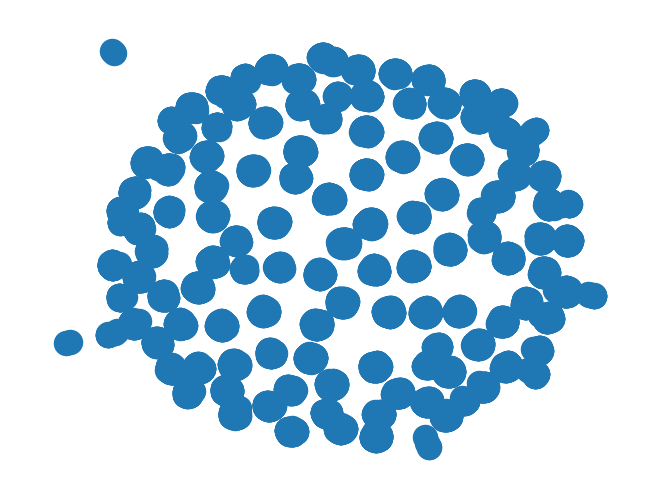

In [77]:
nx.draw(G)

FINAL_FEATURES_TRAINSET

In [37]:
# Чтение из файла FINAL_FEATURES_TRAINTEST
df_final_features_traintest = df1.read_csv("data/FINAL_FEATURES_TRAINTEST.tsv", sep='\t')
df_final_features_traintest.head(10)

,CLIENT_ID,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,...,u8=17,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9
0,7150,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7154,0.0,16.0,156.0,0.0,0.0,20.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7156,0.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26966,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26993,0.0,27.0,153.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,26995,0.0,46.0,9.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,26996,0.0,0.0,843.0,0.0,0.0,276.0,213.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,27004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,27007,0.0,4.0,9.0,0.0,0.0,3.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,27012,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Чтение из файла FINAL_SEQUENCES_MATRIX
df_final_sequences_matrix = df1.read_csv("data/FINAL_SEQUENCES_MATRIX.tsv", sep='\t')
df_final_sequences_matrix.head(10)

,SESSIONS_SEQUENCES
0,"['68a9902529901882ecd5143460468d4c', '79d75347..."
1,['72b88f72bca2636844bb14b9cd9e29b3']
2,"['b496d19eb25556bd64e481d11b6f7dd6', 'd21918bb..."
3,"['dcb3d50673073d3c023db102f21b2d3e', '09a5d816..."
4,"['3de59e26ee7e94a6ccd0a2eead2fab9a', '4a51f13a..."
5,"['d71a939fbfcf75a5044369d437108a27', 'dd43b65e..."
6,"['e70caa4519fd15e96831b80abe204524', 'b71bc9c9..."
7,['8e64955dc5b9de99719d2388012226e8']
8,"['94ae8b79e87cf70605f7f8f022dfa25a', '9ee4b669..."
9,"['e65bd9b13ec4a97ac7b912f37c3e36d4', 'f063190a..."


In [39]:
# Чтение из файла FINAL_FEATURES_TRAINTEST
df = df1.read_csv("data/FINAL_FEATURES_TRAINTEST.tsv",sep='\t')
df.head(10)

,CLIENT_ID,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,...,u8=17,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9
0,7150,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7154,0.0,16.0,156.0,0.0,0.0,20.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7156,0.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26966,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26993,0.0,27.0,153.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,26995,0.0,46.0,9.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,26996,0.0,0.0,843.0,0.0,0.0,276.0,213.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,27004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,27007,0.0,4.0,9.0,0.0,0.0,3.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,27012,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
# Чтение из файла FINAL_TARGETS_DATES_TRAINTEST
df_final_targets_dates_traintest = pd.read_csv("data/FINAL_TARGETS_DATES_TRAINTEST.tsv", sep='\t')
df_final_targets_dates_traintest.head(10)

,CLIENT_ID,RETRO_DT,TARGET
0,1011725,20210501,0
1,1018784,20210501,1
2,1021812,20210501,0
3,1024003,20210501,0
4,1025140,20210501,test
5,1026390,20210501,1
6,1027507,20210501,1
7,1028552,20210501,0
8,1029732,20210501,test
9,1036872,20210501,0


In [ ]:
# Визуализация графа
# graph = nx.Graph()
# graph.add_edge(1,2, weight=)
feats=[]
feat_counts=[]

for i in range(len(df_final_targets_dates_traintest) // 5):
    feat_counts += [len(df_final_targets_dates_traintest.iloc[i])]
    feats += df_final_targets_dates_traintest.iloc[i].values.tolist()

# print(feat_counts[:5], feats[:5])

# plt.hist(feat_counts,bins=20)
# plt.title("Number of features per graph distribution")
# plt.show()

plt.hist(feats,bins=50)
plt.title("Features distribution")
plt.show()

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns
sns.heatmap(df_final_features_traintest.corr(), annot = True)